# imports

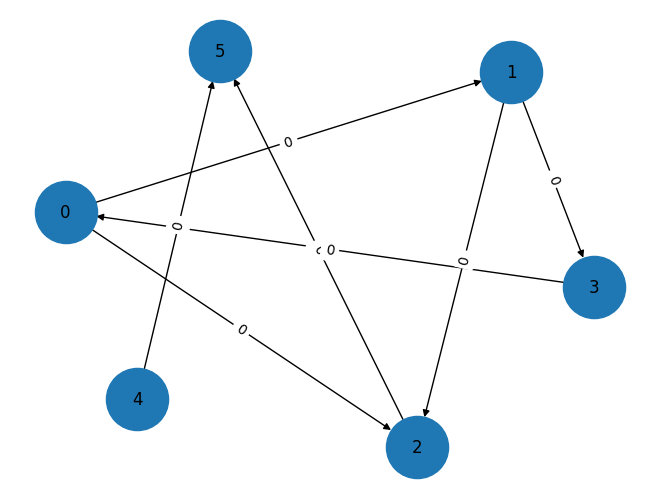

In [92]:
from collections import deque
import math
import networkx as nx
import matplotlib.pyplot as plt

a,b,c,d,e,f,g = 'A','B','C','D','E','F','G'

G = nx.DiGraph()

edges = [
    ("A", "B", 0),
    ("A", "C", 0),
    ("A", "e", 0),
    ("B", "D", 0), 
    ("e", "f", 0),
    ("f", "g", 0),
    ("g", "h", 0),
]

edges1 = [
    (0, 1, 0), 
    (0, 2, 0), 
    (1, 2, 0), 
    (1, 3, 0), 
    (2, 5, 0), 
    (3, 0, 0), 
    (4, 5, 0),
]


G.add_weighted_edges_from(edges1)

pos = nx.spring_layout(G) 
nx.draw(G, pos, with_labels=True, node_size=2000)
nx.draw_networkx_edge_labels(
    G, pos, edge_labels=nx.get_edge_attributes(G, "weight"))

plt.show()

# Directed Graph class

In [ ]:
class DirectedGraph:
    def __init__(self):
        self.edges = {}
        
    def add_vertex(self, vertex):
        self.edges[vertex] = {} 

    def add_edge(self, origin_ver, dest_ver, weight=0):
        self.edges[origin_ver][dest_ver] = weight 

    def add_weighted_edges_from(self, edge_list):
        """
        edge_list: iterable of (origin, destination, weight)
        """
        for origin, dest, weight in edge_list:
            # auto-create vertices if they don't exist
            if origin not in self.edges:
                self.add_vertex(origin)
            if dest not in self.edges:
                self.add_vertex(dest)

            self.add_edge(origin, dest, weight)

    def remove_vertex(self, vertex):
        for in_vert in list(self.edges.keys()):
            # self.remove_edge(adjacent_vert, vertex) 
            if in_vert in self.edges[vertex]:
                del self.edges[in_vert][vertex]  
        
        if vertex in self.edges:
            del self.edges[vertex]

    def remove_edge(self, origin_vert, dest_vert):
        if origin_vert in self.edges and dest_vert in self.edges[origin_vert]:
            del self.edges[origin_vert][dest_vert]  

    def bfs(self, vertex):
        visited = set() 
        queue = deque() 
        queue.append(vertex) # add the 1st vert to the queue
        while queue: # while the queue has elems
            vertex = queue.popleft() # get the 1st elem
            if vertex not in visited: # if the vertext has not been visited 
                visited.add(vertex) # add the vertex to visited 
                print(vertex) # print the vertex whose adjacent verts we are about to loop
                for adjacent_vertex in self.edges[vertex]:
                    queue.append(adjacent_vertex)
    
    def dfs(self, vertex):
        visited = set() 
        self._dfs(vertex, visited) 

    def _dfs(self, vertex, visited): 
        visited.add(vertex)
        print(vertex)
        for neighbor in self.edges[vertex]:
            if neighbor not in visited:
                self._dfs(neighbor, visited) 

    def depth_tracker_dfs(self, vertex):
        visited = set()
        depth_tracker = {'d': 0, 'b': 0}
        self._dfs(vertex, visited, depth_tracker)
    
    def _depth_tracker_dfs(self, vertex, visited, depth_tracker):
        visited.add(vertex)
        
        print('<-', vertex, depth_tracker)

        # check if any child node has len 0 (which means it's a leaf)
        for neighbor in self.edges.get(vertex, {}):
            if len(self.edges[neighbor]) == 0:
                print("PRE LEAF NODE", vertex, depth_tracker['d'])

        for neighbor in self.edges.get(vertex, {}):
            if neighbor not in visited:
                depth_tracker['d'] += 1
                self._dfs(neighbor, visited, depth_tracker) 

                # backtracking
                depth_tracker['b'] += 1
                depth_tracker['d'] -= 1
                print('-->', vertex, depth_tracker)

    def eventual_safe_nodes(self):
        """
        original implementation
        for leetcode 802 
        """
        # states:
        # 0 = unvisited
        # 1 = visiting (on DFS stack)
        # 2 = safe (fully explored, no cycle below)
        state = {v: 0 for v in self.edges}

        def dfs_safe(v):
            if state[v] != 0:
                return state[v] == 2  # already known

            state[v] = 1  # mark as visiting

            for neighbor in self.edges[v]:
                if not dfs_safe(neighbor):  # cycle detected downstream
                    return False

            state[v] = 2  # safe
            return True

        safe_nodes = []
        for v in self.edges:
            if dfs_safe(v):
                safe_nodes.append(v)

        return sorted(safe_nodes)




    def esn(self):
        """
        eventual_safe_nodes, leet 802

        0 = unvisited
        1 = visiting 
        2 = safe, no cycles 

        ds = dfs safe 
        """
        
        pass 
    

# eof

In [107]:
# for leet 802 graph input
def build_graph_from_list(adj_list):
    g = DirectedGraph()
    n = len(adj_list)
    edges = []

    for u in range(n):
        g.add_vertex(u)
        for v in adj_list[u]:
            g.add_edge(u, v, weight=0)
            edges.append((u, v, 0))
    
    return g, edges

graph_input_1 = [[1,2],[2,3],[5],[0],[5],[],[]]
graph_input_2 = [[1,2,3,4],[1,2],[3,4],[0,4],[]]

g1 = build_graph_from_list(graph_input_2)

# print(g1[0].edges)
print(g1[0].esn())

[4]


In [98]:
for e in g1[1]:
    print(e)

(0, 1, 0)
(0, 2, 0)
(1, 2, 0)
(1, 3, 0)
(2, 5, 0)
(3, 0, 0)
(4, 5, 0)


In [82]:
g = DirectedGraph()

g.add_weighted_edges_from(edges1)

print(g.edges)

g.eventual_safe_nodes()

{0: {1: 0, 2: 0}, 1: {2: 0, 3: 0}, 2: {5: 0}, 3: {0: 0}, 5: {}, 4: {5: 0}}


[2, 4, 5]